# Analytical report

**CHENG-WEI, HSUEH**

## Preprocess  - Data identification & Data cleaning

_1. Import the packages & reading the file_

In [1]:
#DataFrame 
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Array package
import numpy as np

#Provide the address of data
addr = "https://raw.githubusercontent.com/CHENG-WEI-HSUEH/Kaggle/main/CardioGoodFitness.csv"

#Get the data
raw_data = pd.read_csv(addr)

_2. Checking the vareity, volume, and varacity of data_

In [2]:
#Check its shape
print(raw_data.shape)

(180, 9)


_There are 180 of customers' data and each data have 9 columns._

In [3]:
#Check the missing values and data types
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


_There is no missing value in the file_

## Data exploration

_1. Find the unique values in non-primitive data._

In [4]:
print(np.unique(raw_data["Product"]))
print(np.unique(raw_data["Gender"]))
print(np.unique(raw_data["MaritalStatus"]))

['TM195' 'TM498' 'TM798']
['Female' 'Male']
['Partnered' 'Single']


_2. Generate descriptive statistics_

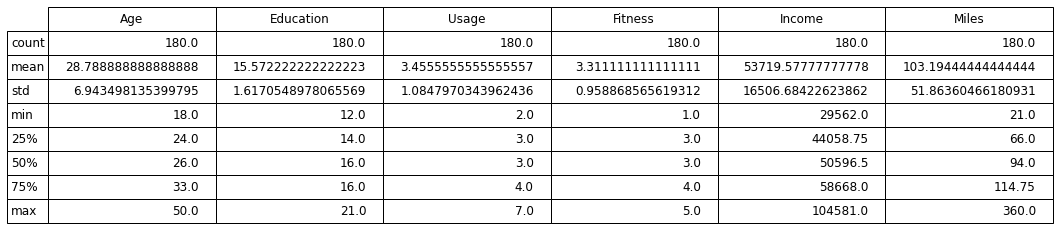

In [70]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


rows = ['Count','Mean','Std','Min','25%','50%','75%','Max']
Row_labels = pd.DataFrame(rows)
Statistical_Data = raw_data.describe()




Statistical_Table = ax.table(cellText=Statistical_Data.values, colWidths=[0.25]*6, colLabels = Statistical_Data.columns, rowLabels = Statistical_Data.index, loc='center')
Statistical_Table.set_fontsize(34)
Statistical_Table.scale(2, 2)

plt.show()


_3.Show the proportions of models, gender, and marital status_

In [9]:
#Find unique values and show the number of each values
(Product_uni, Product_counts) = np.unique(raw_data["Product"], return_counts=True)
Product_Data = np.asarray((Product_uni, Product_counts)).T

(Gender_uni, Gender_counts) = np.unique(raw_data["Gender"], return_counts=True)
Gender_Data = np.asarray((Gender_uni, Gender_counts)).T

(MaritalStatus_uni, MaritalStatus_counts) = np.unique(raw_data["MaritalStatus"], return_counts=True)
MaritalStatus_Data = np.asarray((MaritalStatus_uni, MaritalStatus_counts)).T

print(Product_Data)
print(Gender_Data)
print(MaritalStatus_Data)

[['TM195' 80]
 ['TM498' 60]
 ['TM798' 40]]
[['Female' 76]
 ['Male' 104]]
[['Partnered' 107]
 ['Single' 73]]


## Visualization

_1. Show the percetage of moddels, gender, and marital status with pie charts_

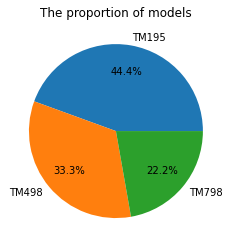

In [10]:
plt.title('The proportion of models')
(Proportion_Labels, Proportion_Data) = np.unique(raw_data['Product'], return_counts=True)

plt.pie(Proportion_Data, labels = Proportion_Labels, autopct='%.1f%%', pctdistance=0.7, labeldistance=1.1)
plt.show()

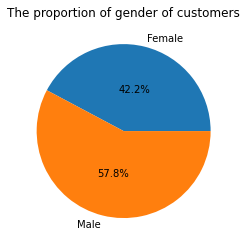

In [15]:
plt.title('The proportion of gender of customers')
(Gender_Labels, Gender_Data) = np.unique(raw_data['Gender'], return_counts=True)

plt.pie(Gender_Data, labels = Gender_Labels, autopct='%.1f%%', pctdistance=0.5, labeldistance=1.1)
plt.show()

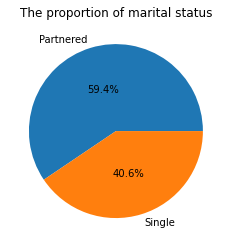

In [14]:
plt.title('The proportion of marital status')
(MaritalStatus_Labels, MaritalStatus_Data) = np.unique(raw_data['MaritalStatus'], return_counts=True)

plt.pie(MaritalStatus_Data, labels = MaritalStatus_Labels, autopct='%.1f%%', pctdistance=0.5, labeldistance=1.1)
plt.show()

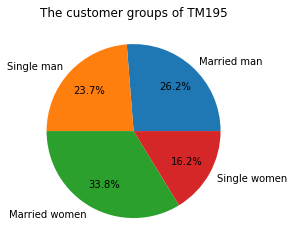

In [90]:
#Classify customer by models
Data_TM195 = raw_data.groupby(['Product']).get_group('TM195')

#Further Classify customer by gender
Data_TM195_Male = Data_TM195.groupby(['Gender']).get_group('Male')
Data_TM195_Female = Data_TM195.groupby(['Gender']).get_group('Female')

#Finally Classify customer by marital status and count the number
Data_TM195_Male_Married = len(Data_TM195_Male.groupby(['MaritalStatus']).get_group('Partnered'))
Data_TM195_Male_Single = len(Data_TM195_Male.groupby(['MaritalStatus']).get_group('Single'))
Data_TM195_Female_Married = len(Data_TM195_Female.groupby(['MaritalStatus']).get_group('Partnered'))
Data_TM195_Female_Single = len(Data_TM195_Female.groupby(['MaritalStatus']).get_group('Single'))

#Merge the data
Proportion_TM195 = [Data_TM195_Male_Married, Data_TM195_Male_Single, Data_TM195_Female_Married, Data_TM195_Female_Single]

#Create leabels
Labels = ['Married man', 'Single man', 'Married women', 'Single women']
plt.title('The customer groups of TM195')
plt.pie(Proportion_TM195, labels = Labels, autopct='%.1f%%', pctdistance=0.7, labeldistance=1.1)
plt.show()

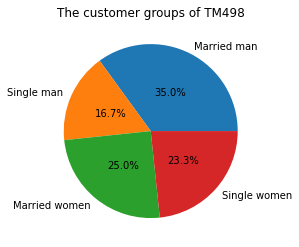

In [85]:
#Classify customer by models
Data_TM498 = raw_data.groupby(['Product']).get_group('TM498')

#Further Classify customer by gender
Data_TM498_Male = Data_TM498.groupby(['Gender']).get_group('Male')
Data_TM498_Female = Data_TM498.groupby(['Gender']).get_group('Female')

#Finally Classify customer by marital status and count the number
Data_TM498_Male_Married = len(Data_TM498_Male.groupby(['MaritalStatus']).get_group('Partnered'))
Data_TM498_Male_Single = len(Data_TM498_Male.groupby(['MaritalStatus']).get_group('Single'))
Data_TM498_Female_Married = len(Data_TM498_Female.groupby(['MaritalStatus']).get_group('Partnered'))
Data_TM498_Female_Single = len(Data_TM498_Female.groupby(['MaritalStatus']).get_group('Single'))

#Merge the data
Proportion_TM498 = [Data_TM498_Male_Married, Data_TM498_Male_Single, Data_TM498_Female_Married, Data_TM498_Female_Single]

#Create leabels
plt.title('The customer groups of TM498')
plt.pie(Proportion_TM498, labels = Labels, autopct='%.1f%%', pctdistance=0.5, labeldistance=1.1)
plt.show()

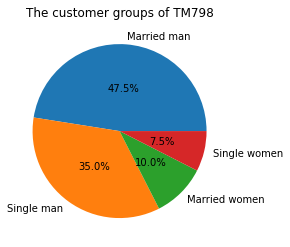

In [87]:
#Classify customer by models
Data_TM798 = raw_data.groupby(['Product']).get_group('TM798')

#Further Classify customer by gender
Data_TM798_Male = Data_TM798.groupby(['Gender']).get_group('Male')
Data_TM798_Female = Data_TM798.groupby(['Gender']).get_group('Female')

#Finally Classify customer by marital status and count the number
Data_TM798_Male_Married = len(Data_TM798_Male.groupby(['MaritalStatus']).get_group('Partnered'))
Data_TM798_Male_Single = len(Data_TM798_Male.groupby(['MaritalStatus']).get_group('Single'))
Data_TM798_Female_Married = len(Data_TM798_Female.groupby(['MaritalStatus']).get_group('Partnered'))
Data_TM798_Female_Single = len(Data_TM798_Female.groupby(['MaritalStatus']).get_group('Single'))

#Merge the data
Proportion_TM798 = [Data_TM798_Male_Married, Data_TM798_Male_Single, Data_TM798_Female_Married, Data_TM798_Female_Single]

#Create leabels
plt.title('The customer groups of TM798')
plt.pie(Proportion_TM798, labels = Labels, autopct='%.1f%%', pctdistance=0.5, labeldistance=1.1)
plt.show()

_2. Show the population pyramids of customers_

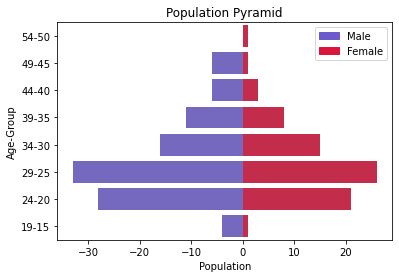

In [18]:
'''
Subfunctions
'''
def Set_AgeGroups(Data,Age_Range):
    Age_groups = [0,0,0,0,0,0,0,0]

    Set_Index = 0
    Age_Flag = Data[0][0]//5
    for temp in Data:
        if temp[0]//Age_Range != Age_Flag:
            Set_Index+=1
            Age_Flag = temp[0]//Age_Range

        Age_groups[Set_Index] += temp[1]
    
    Age_groups = Age_groups[::-1]
    return Age_groups

#Classify customer by gender
Data_M = raw_data.groupby(['Gender']).get_group('Male')
Data_F = raw_data.groupby(['Gender']).get_group('Female')

#Set the population by age groups
(unique_M, counts_M) = np.unique(Data_M["Age"], return_counts=True)
#being negative to show left side of population of pyramid
counts_M[counts_M>0] *= -1    
Age_data_M = np.asarray((unique_M, counts_M)).T

(unique_F, counts_F) = np.unique(Data_F["Age"], return_counts=True)
Age_data_F = np.asarray((unique_F, counts_F)).T


#Set the groups data
Age_labels = ['54-50','49-45','44-40','39-35','34-30','29-25','24-20','19-15']
Age_Groups = np.asarray((Age_labels, Set_AgeGroups(Age_data_M,5), Set_AgeGroups(Age_data_F,5))).T
Population_info = pd.DataFrame(Age_Groups, columns = ['Age','Male','Female'])


#Visualize raw data

#Set legends, colors, and labels
colors = {'Male':'slateblue', 'Female':'crimson'}    
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


#Plot
bar_plot = sns.barplot(x='Male', y='Age', color="slateblue", data=Population_info, order=Age_labels)
bar_plot = sns.barplot(x='Female', y='Age', color="crimson", data=Population_info, order=Age_labels)
bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid")
plt.show()

_3.Gernerate a heat map of correlation._

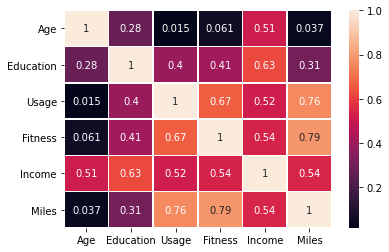

In [19]:
ax = sns.heatmap(raw_data.corr(), linewidth=0.5, annot=True)
plt.show()

_4.Create box plots to show the distribution of age, incomes, mills, education, and usage._

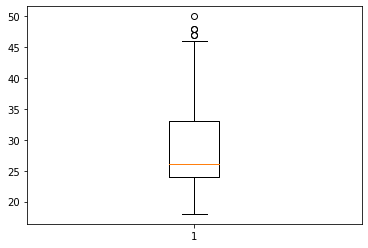

In [26]:
# Creating plot
plt.boxplot(raw_data['Age'])

# show plot
plt.show()

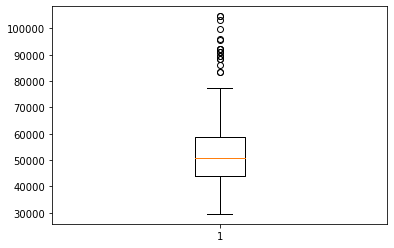

In [22]:
# Creating plot
plt.boxplot(raw_data['Income'])

# show plot
plt.show()

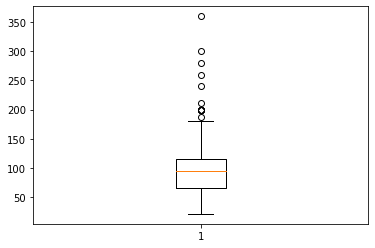

In [23]:
# Creating plot
plt.boxplot(raw_data['Miles'])

# show plot
plt.show()

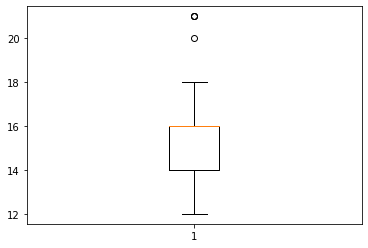

In [24]:
# Creating plot
plt.boxplot(raw_data['Education'])

# show plot
plt.show()

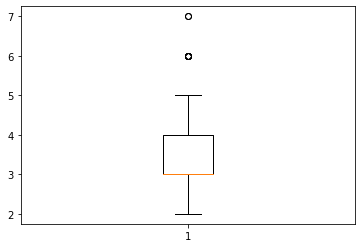

In [25]:
# Creating plot
plt.boxplot(raw_data['Usage'])

# show plot
plt.show()

_5.Overview the distribution of the data_

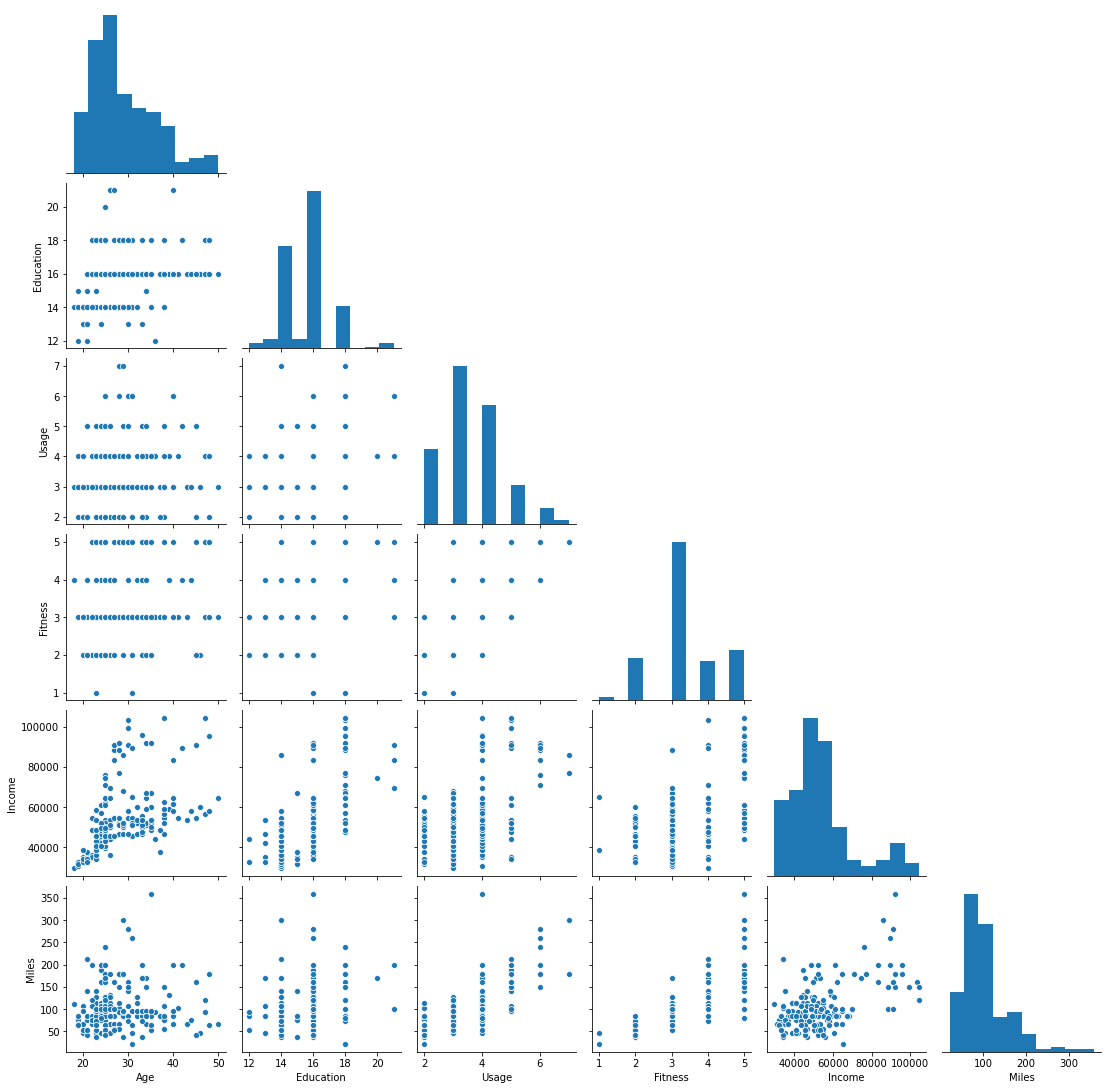

In [72]:
sns.pairplot(raw_data,corner=True)

_6. Show the times people using based on different fitness_
_7. Show the miles people run based on different fitness_

In [94]:
#Classify customer by Fitness
Data_Fitness_1 = raw_data.groupby(['Fitness']).get_group(1)


print(Data_Fitness_1['Usage'].describe())
print()
print(Data_Fitness_1['Miles'].describe())
print()

count    2.000000
mean     2.500000
std      0.707107
min      2.000000
25%      2.250000
50%      2.500000
75%      2.750000
max      3.000000
Name: Usage, dtype: float64

count     2.000000
mean     34.000000
std      18.384776
min      21.000000
25%      27.500000
50%      34.000000
75%      40.500000
max      47.000000
Name: Miles, dtype: float64



In [95]:
#Classify customer by Fitness
Data_Fitness_2 = raw_data.groupby(['Fitness']).get_group(2)


print(Data_Fitness_2['Usage'].describe())
print()
print(Data_Fitness_2['Miles'].describe())
print()

count    26.000000
mean      2.538462
std       0.646886
min       2.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Usage, dtype: float64

count    26.000000
mean     51.692308
std      11.824616
min      38.000000
25%      43.250000
50%      47.000000
75%      53.000000
max      85.000000
Name: Miles, dtype: float64



In [96]:
#Classify customer by Fitness
Data_Fitness_3 = raw_data.groupby(['Fitness']).get_group(3)


print(Data_Fitness_3['Usage'].describe())
print()
print(Data_Fitness_3['Miles'].describe())
print()

count    97.000000
mean      3.164948
std       0.745548
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Usage, dtype: float64

count     97.000000
mean      87.185567
std       19.203586
min       53.000000
25%       75.000000
50%       85.000000
75%       95.000000
max      170.000000
Name: Miles, dtype: float64



In [97]:
#Classify customer by Fitness
Data_Fitness_4 = raw_data.groupby(['Fitness']).get_group(4)


print(Data_Fitness_4['Usage'].describe())
print()
print(Data_Fitness_4['Miles'].describe())
print()

count    24.000000
mean      3.916667
std       0.928611
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       6.000000
Name: Usage, dtype: float64

count     24.000000
mean     131.625000
std       37.623781
min       74.000000
25%      106.000000
50%      127.000000
75%      160.000000
max      212.000000
Name: Miles, dtype: float64



In [98]:
#Classify customer by Fitness
Data_Fitness_5 = raw_data.groupby(['Fitness']).get_group(5)


print(Data_Fitness_5['Usage'].describe())
print()
print(Data_Fitness_5['Miles'].describe())
print()

count    31.000000
mean      4.838710
std       1.003221
min       3.000000
25%       4.000000
50%       5.000000
75%       5.500000
max       7.000000
Name: Usage, dtype: float64

count     31.000000
mean     178.935484
std       60.290926
min       80.000000
25%      150.000000
50%      170.000000
75%      200.000000
max      360.000000
Name: Miles, dtype: float64



# Coclusion

## Non-primitive variable

**Models - Top Selling Model**

In the survey, there were 3 different types of models namely TM195, TM498, and TM798, while 
80 cumstomer chose TM198 whose proportion was roughly 45%. Obviously, TM195 was
the most popular product at that time.

**Gender - Were the number of men buying teadmil greater than that of women?**

It's evident that the proportion of men buying treadmils(57.8%) outweighs that of women.

**Marital status - Were the number of married persons buying teadmil greater than that of the single?**

The number of married customers was more than singled customers. There are 107 married customer and 73
singled customer.



## Cross analysis

**The correlation among models, gender, marital status**

We've known that TM195 was the most popular models, while it can be further analyzed to figure out the
core customers groups in each model. We can divid the data based on the customer's gender, marital status,
and the models they bought.

**TM195**

The percentage of **married female customers** slightly much more than the others. Additionally, married customers 
accounted for amlost 60%. Thus, it can be referred that the prospective customers were those who are married.

**TM498**

There is a similar pattern with TM195. Its core customers are married customers, which accounts for 60%.
However, TM498 seems to be preferred by **married male customers** instead of married female customers.

**TM798**

It is evident that the majority of TM798 customers are male, and it made up 82.5%. Thus, **male customers** should be
the TM198 targetting customers.

## Numeric variable

**Age - customer's age grops**

Based on the population pyramid, it can be seem that the majority of customers were between 20 and 30 years old. 
Additionally, the descriptive statistical report shows that median of customer's age is about 26 years old.

**Marital status and Income**

Based on above analysis, we've known that a large part of customers are married. As the median of customer's income
was located at approximate 51000 dollars per year, it means most customers are from middle class families.

## Cross analysis

Before cross analysis, we should pick the attributions which have higher coorelation from the heat map; thus, I 
choose those coorelations which are more than 0.5. There are 8 data set whose correlation is more than 0.5, namely,
**(Income & Age), (Income & Education), (Income & Usage), (Income & Fitness), (Income & Miles), (Miles & Fitness),
 (Miles, Usage), and (Fitness & Usage)**.

However, as much more caring about sport-relevant information, we only analyze **(Miles & Fitness), (Miles, Usage),
and (Fitness & Usage)**.

There are close positive relationship among them. The patterns can be a convincing evidence to prove the effect 
of the treadmils.

## Strategy

Now, based on above analysis, we can list our targeting customers' income, age, marital status; additionally, we 
can recommand different models for different status. Furthermore, we advise customers the recommanded miles and
the times used in order to approch the expected fitness. Finally, we prove the effect of products with the analysis 
report.

**Top selling products** - TM195

**Targeting customers** - married young adults from middle class families

**Recommation** - 

Married male customer - TM798

Married female customer - TM195

Fitness 5 - miles:170, usage:5

Fitness 4 - miles:127, usage:4

Fitness 3 - miles:85,  usage:3